# Week 5&6 (Veera Reddy Koppula)

**Lesson 5 - Activity 7, page 207** In this activity you are given the Wikipedia page where we have the GDP of all countries listed and you are asked to create three data frames from the three sources mentioned in the page ( link - https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal) )

You will have to -

- Open the page in a separate chrome/firefox tab and use something like `inspect element` tool to see the source HTML and understand the structure
- Read the page using bs4
- Find the table structure you will need to deal with (how many tables are there)
- Find the right table using bs4
- Separate the Source Names and their corresponding data
- Get the source names from the list of sources you have created
- Seperate the header and data from the data that you separated before. For the first source only. And then create a DataFrame using that
- Repeat the last task for the other two data sources.

**Read the page Wikipedia page with GDP of all countries using bs4 package**

In [2]:
# Import BueautifulSoup for scraping web data and Padas for working with data
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
# Open GDP of all countries listed from wikipedia in read mode
fd = open("List of countries by GDP (nominal) - Wikipedia.htm", "r")
soup = BeautifulSoup(fd)
fd.close()

**Find the table structure you will need to deal with (how many tables are there)**

In [4]:
# Scraping source for all the tables & printing the count
all_tables = soup.find_all("table")
print("Total number of tables are {} ".format(len(all_tables)))

Total number of tables are 9 


**Find the right table**

In [5]:
# After inspecting the elements - loading the below table 
#class="wikitable sortable static-row-numbers plainrowheaders srn-white-background jquery-tablesorter"
data_table = soup.find("table", {"class": '"wikitable"|}'})
print(type(data_table))

<class 'bs4.element.Tag'>


**Separate the Source Names and their corresponding data** (in the table header)

In [14]:
# finding all the source names and forming the list of sources
sources = data_table.tbody.findAll('tr', recursive=False)[0]
sources_list = [td for td in sources.findAll('td')]
print(len(sources_list))

3


In [15]:
#saving all the data into a table
data = data_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)

In [16]:
#seperating data by source and appending corresponding data into data_tables list
data_tables = []
for td in data:
    data_tables.append(td.findAll('table'))

In [17]:
#length of data_tables list
len(data_tables)

3

**Get the source names from the list of sources you have created**

In [13]:
# All the tags that have an 'a' in html tag are source names
source_names = [source.findAll('a')[0].getText() for source in sources_list]
print(source_names)

['International Monetary Fund', 'World Bank', 'United Nations']


**Seperate the header and data from the data that you separated before. For the first source only. And then create a DataFrame using that** (International Monetary Fund)

In [28]:
# forming the header from first list of data_table list of list  - which corresponds to first source "IMF"
header1 = [th.getText().strip() for th in data_tables[0][0].findAll('thead')[0].findAll('th')]
header1

['Rank', 'Country', 'GDP(US$MM)']

In [29]:
#Extractig the data rows from table from first list of list (correspodning to IMF)
rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')[1:]

In [30]:
# stripping away text and saving the data
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]

In [31]:
#forming a data from from the "IMF" stripped data and appending header from the header List extracted above
df1 = pd.DataFrame(data_rows1, columns=header1)

In [32]:
#Printing top rows from the data frame
df1.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,600"
1,2,China[n 1],"12,014,610"
2,3,Japan,"4,872,135"
3,4,Germany,"3,684,816"
4,5,United Kingdom,"2,624,529"


**Repeat the last task for the other two data sources** (World Bank and UN)

In [33]:
# Extract headers from second list - corresponding to second soure "world bank"
header2 = [th.getText().strip() for th in data_tables[1][0].findAll('thead')[0].findAll('th')]
header2

['Rank', 'Country', 'GDP(US$MM)']

In [34]:
#Extractig the data rows from table from first list of list (correspodning to "world Bank")
rows2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')[1:]

In [38]:
#When observed closely there are special charecters in the data table for "world bank"
#below function is used to strip text and the special charecters
def find_right_text(i, td):
    if i == 0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        index = td.text.find("♠")
        return td.text[index+1:].strip()

In [39]:
# stripping away text and saving the data
data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]

In [40]:
#forming a data from from the "World Bank" stripped data and appending header from the header List extracted above
df2 = pd.DataFrame(data_rows2, columns=header2)

In [41]:
#Printing top rows from the data frame
df2.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


In [42]:
# Extract headers from third list - corresponding to second soure "UN"
header3 = [th.getText().strip() for th in data_tables[2][0].findAll('thead')[0].findAll('th')]
header3

['Rank', 'Country', 'GDP(US$MM)']

In [43]:
#Extractig the data rows from table from third list of list (correspodning to UN)
#There are special charecters similar to World Bank data - so we need to strip them away
rows3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')[1:]

In [47]:
# stripping away text and special charectars (Using same as World Bank Data)
data_rows3 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows3]

In [48]:
#forming a data from from the "UN" stripped data and appending header from the header List extracted above
df3 = pd.DataFrame(data_rows3, columns=header3)

In [49]:
#Printing top rows from the data frame
df3.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"18,624,475"
1,2,China[n 4],"11,218,281"
2,3,Japan,"4,936,211"
3,4,Germany,"3,477,796"
4,5,United Kingdom,"2,647,898"


**Lesson 06 - Activity 8, page 233**

In this activity, we will identify and get rid of outliers. Here, we have a CSV file. The goal here is to clean the data by using the knowledge that we have learned about so far and come up with a nicely formatted DataFrame. Identify the type of outliers and their effect on the data and clean the messy data.
The steps that will help you solve this activity are as follows:
1. Read the visit_data.csv file.
2. Check for duplicates.
3. Check if any essential column contains NaN.
4. Get rid of the outliers.
5. Report the size difference.
6. Create a box plot to check for outliers.
7. Get rid of any outliers.

**Create a data frame from visit_data CSV**

#Import needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Reading Visit data csv into a data frame using pandas
df = pd.read_csv("visit_data.csv")

In [3]:
#Prining top rows
df.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


**Check for duplicates**

In [5]:
#Checking if there duplicates in First Name, Last Name and email columns
print("First name has duplicates? - {}".format(any(df.first_name.duplicated())))
print("Last name has duplicates? - {}".format(any(df.last_name.duplicated())))
print("Email has duplicates? - {}".format(any(df.email.duplicated())))

First name has duplicates? - True
Last name has duplicates? - True
Email has duplicates? - False


There are duplicates in both First and Last names, which could be expected. However there are no duplicate email id rows.

**Check if any essential column contains NaN**

In [6]:
# Checking if there are any NaN values in important columns
print("The column Email contains NaN - %r " % df.email.isnull().values.any())
print("The column IP Address contains NaN - %s " % df.ip_address.isnull().values.any())
print("The column Visit contains NaN - %s " % df.visit.isnull().values.any())

The column Email contains NaN - False 
The column IP Address contains NaN - False 
The column Visit contains NaN - True 


If we are to use this data set meaningfully, we would need to be able to identify unique email address and IPs visiting the site and the duration of visit. In the current set column visit contains some None values, these rows will be unusable outliers for generating insights on the number and duration of visits.

**Get rid of the outliers**

In [8]:
# Saving a backup of original data & calculating the size
df_orig = df
size_orig = df_orig.shape
#Stripping none values in visit column and saving back to current data set
df = df[np.isfinite(df['visit'])]
#calculating size of the data after clean-up
size_cleaned = df.shape

**Report the size difference**

In [9]:
print("The size of previous data was - {prev[0]} rows and the size of the new one is - {after[0]} rows".
      format(prev=size_orig, after=size_cleaned))

The size of previous data was - 1000 rows and the size of the new one is - 974 rows


**Create a box plot to check for outliers**

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc128d95bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc128da32b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc128d95850>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc128da3970>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc128da3cd0>],
 'means': []}

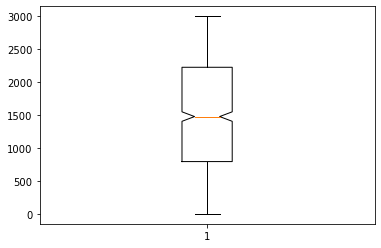

In [13]:
#Creating a box plot on visit column to check outliers
plt.boxplot(df.visit, notch=True)

As we can see that we have data in this column in the interval (0, 3000). However, the main concentration of the data is between ~700 to ~2300. We could consuder data above 2900 and less than 100 as outliers and get rid of them for the purposes of further analysis.

**Get rid of any outliers**

In [11]:
# getting rid of data with visit <=100 and >=2900
df_final = df[(df['visit'] <= 2900) & (df['visit'] >= 100)]  # Notice the powerful & operator

In [12]:
print("After getting rid of outliers the new size of the data is - {}".format(*df_final.shape))

After getting rid of outliers the new size of the data is - 923


**3. Insert data into a SQL Lite database – create a table with the following data (Hint: Python for Data Analysis page 191):**

a. Name, Address, City, State, Zip, Phone Number

b. Add at least 10 rows of data and submit your code with a query generating your results.

In [39]:
#importing sqllite
import sqlite3

In [40]:
#query outline to insert - Name, Address, City, State, Zip, Phone Number
query = """
       .....: CREATE TABLE week5_task3
       .....: (Name VARCHAR(20), Address VARCHAR(20),
       .....:  City VARCHAR(20), State VARCHAR(2),
       .....: Zip VARCHAR(10),PhoneNumber INTEGER);"""

In [41]:
#creating a sqllite db connection to temp schema "mydata.sqllite"
con = sqlite3.connect('mydata.sqlite')

In [42]:
#opening cursor for query execution to create the table
con.execute(query)

In [43]:
#Commit after create table
con.commit()

In [44]:
#Data set to insert 11 rows of data
data = [('Sam Test', '123 Test Av', 'Atlanta', 'GA','30040',1231231234),
        .....:         ('Tom Tommy', '123 George St', 'Salem', 'PA','19830',1231234567),
        .....:         ('George C', '123 Hollywood Av', 'Los Angeles', 'CA','06671',12315781234),
        .....:         ('Honey S', '676 Hollywood Av', 'Los Angeles', 'CA','06671',5781231234),
        .....:         ('Amla Dean', '576 Casino Av', 'Los Vegas', 'NE','16671',1231333234),
        .....:         ('Florida Cat', '323 Gaters Av', 'Miami', 'FL','99671',5555231234),
        .....:         ('Party Sam', '9923 Bar Dr', 'New Orleans', 'LA','50001',1231244444),
        .....:         ('Cheese Danish', '333 Cheese Cr', 'Milwaukee', 'WI','66671',1543451234),
        .....:         ('Potato Fries', '6421 McDonalds Ct', 'Idaho City', 'IA','45891',6101231234),
        .....:         ('Allegator Why', '33 Ocean Dr', 'Mobile', 'AL','06671',3145671234),
        .....:         ('Dean Wright', '4565 Bingham Ct', 'Newark', 'DE','88898',8907651234),
        .....:         ('Angela Wright', '4565 Bingham Ct', 'Newark', 'DE','88898',8902351234)]

In [45]:
#query statment to insert above data
stmt = "INSERT INTO week5_task3 VALUES(?, ?, ?, ?,?,?)"

In [46]:
#Execution of insert statement query with data
con.executemany(stmt, data)

In [47]:
#Commit after data insert
con.commit()

In [48]:
#execute select to get data stream onto cursor
cursor = con.execute('select * from week5_task3')

In [49]:
#Saving returned sql db data into rows variable
rows = cursor.fetchall()

In [50]:
#printing all the data
rows

[('Sam Test', '123 Test Av', 'Atlanta', 'GA', '30040', 1231231234),
 ('Tom Tommy', '123 George St', 'Salem', 'PA', '19830', 1231234567),
 ('George C', '123 Hollywood Av', 'Los Angeles', 'CA', '06671', 12315781234),
 ('Honey S', '676 Hollywood Av', 'Los Angeles', 'CA', '06671', 5781231234),
 ('Amla Dean', '576 Casino Av', 'Los Vegas', 'NE', '16671', 1231333234),
 ('Florida Cat', '323 Gaters Av', 'Miami', 'FL', '99671', 5555231234),
 ('Party Sam', '9923 Bar Dr', 'New Orleans', 'LA', '50001', 1231244444),
 ('Cheese Danish', '333 Cheese Cr', 'Milwaukee', 'WI', '66671', 1543451234),
 ('Potato Fries',
  '6421 McDonalds Ct',
  'Idaho City',
  'IA',
  '45891',
  6101231234),
 ('Allegator Why', '33 Ocean Dr', 'Mobile', 'AL', '06671', 3145671234),
 ('Dean Wright', '4565 Bingham Ct', 'Newark', 'DE', '88898', 8907651234),
 ('Angela Wright', '4565 Bingham Ct', 'Newark', 'DE', '88898', 8902351234)]

In [51]:
#alternate way to perform select query using sql alchemy package
import sqlalchemy as sqla

In [52]:
#forming sql connection to my sql db.
db = sqla.create_engine('sqlite:///mydata.sqlite')

In [53]:
#selcting data from temp table week5_task3 and printing in a neat pandas dataframe format
pd.read_sql('select * from week5_task3', db)

,Name,Address,City,State,Zip,PhoneNumber
0,Sam Test,123 Test Av,Atlanta,GA,30040,1231231234
1,Tom Tommy,123 George St,Salem,PA,19830,1231234567
2,George C,123 Hollywood Av,Los Angeles,CA,06671,12315781234
3,Honey S,676 Hollywood Av,Los Angeles,CA,06671,5781231234
4,Amla Dean,576 Casino Av,Los Vegas,NE,16671,1231333234
5,Florida Cat,323 Gaters Av,Miami,FL,99671,5555231234
6,Party Sam,9923 Bar Dr,New Orleans,LA,50001,1231244444
7,Cheese Danish,333 Cheese Cr,Milwaukee,WI,66671,1543451234
8,Potato Fries,6421 McDonalds Ct,Idaho City,IA,45891,6101231234
9,Allegator Why,33 Ocean Dr,Mobile,AL,06671,3145671234
